##**Dataset: CBC (Complete Blood Count).**

**Key steps include:**
Handling missing values
Replacing erroneous entries such as scientific notation placeholders with 0.
Data validation ensuring percentages sum to ~100% and absolute counts sum to WBC.
Outlier detection using IQR method
No new columns created as data is fully numerical and consistent; added temporary sums for validation.

**Objective**
Perform an end-to-end exploratory data analysis (EDA) to understand the CBC dataset structure, clean the data, and extract meaningful insights on blood health indicators.

##**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

##**2. Load Dataset**

In [ ]:
file_path = "/content/cbc_dataframe.csv"
df = pd.read_csv(file_path)

##**3. Initial Data Inspection**

In [ ]:
# Display first few rows
df.head()

,WBC,LY%,MO%,NE%,EO%,BA%,LY#,MO#,NE#,EO#,BA#,RBC,HGB,HCT,MCV,MCHC,MCH,RDW,PLT,MPV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.6,21.1,7.1,66.8,4.4,0.5,1.6,0.5,5.1,0.3,5.397605e-79,4.73,14.1,41.8,88.5,33.6,29.7,13.7,214.0,7.7
2,7.5,37.8,8.1,39.0,14.9,0.3,2.8,0.6,2.9,1.1,5.397605e-79,4.52,13.7,39.3,86.9,34.8,30.3,11.7,270.0,8.6
3,8.8,57.7,6.2,24.1,11.4,0.6,5.1,0.5,2.1,1.0,1.000000e-01,4.77,9.3,29.4,61.5,31.6,19.4,15.3,471.0,7.8
4,5.9,37.8,6.2,52.2,3.4,0.4,2.2,0.4,3.1,0.2,5.397605e-79,5.13,14.5,43.6,84.9,33.3,28.3,13.1,209.0,10.4


In [ ]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Overview of dataset
df.info()

# Statistics
df.describe(include='all')

Shape of dataset: (66002, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66002 entries, 0 to 66001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WBC     59254 non-null  float64
 1   LY%     59106 non-null  float64
 2   MO%     59106 non-null  float64
 3   NE%     59106 non-null  float64
 4   EO%     59106 non-null  float64
 5   BA%     59106 non-null  float64
 6   LY#     59103 non-null  float64
 7   MO#     59103 non-null  float64
 8   NE#     59103 non-null  float64
 9   EO#     59103 non-null  float64
 10  BA#     59103 non-null  float64
 11  RBC     59257 non-null  float64
 12  HGB     59257 non-null  float64
 13  HCT     59256 non-null  float64
 14  MCV     59256 non-null  float64
 15  MCHC    59256 non-null  float64
 16  MCH     59256 non-null  float64
 17  RDW     59256 non-null  float64
 18  PLT     59254 non-null  float64
 19  MPV     59254 non-null  float64
dtypes: float64(20)
memory usage: 10.1 MB


,WBC,LY%,MO%,NE%,EO%,BA%,LY#,MO#,NE#,EO#,BA#,RBC,HGB,HCT,MCV,MCHC,MCH,RDW,PLT,MPV
count,59254.000000,59106.000000,59106.000000,59106.000000,5.910600e+04,5.910600e+04,59103.000000,5.910300e+04,59103.000000,5.910300e+04,5.910300e+04,59257.000000,59257.000000,59256.000000,59256.000000,59256.000000,59256.000000,59256.000000,59254.000000,59254.000000
mean,7.268245,33.448872,7.980026,54.880560,3.043131e+00,6.824333e-01,2.377350,5.624875e-01,4.063633,2.167910e-01,3.991337e-02,4.660687,13.859915,40.726585,87.563124,34.026230,29.806334,12.768908,277.212455,7.994029
std,2.361675,10.731217,2.412175,11.866255,2.451051e+00,5.981749e-01,1.209552,2.092018e-01,1.808064,1.947501e-01,6.891654e-02,0.483115,1.508060,4.395585,6.153773,0.931026,2.365089,1.166292,76.088227,0.920566
min,1.400000,2.700000,0.600000,0.800000,5.397605e-79,5.397605e-79,0.200000,5.397605e-79,0.100000,5.397605e-79,5.397605e-79,1.710000,5.800000,16.300000,50.500000,25.100000,14.700000,6.300000,4.000000,4.700000
25%,5.700000,26.100000,6.400000,47.700000,1.500000e+00,4.000000e-01,1.700000,4.000000e-01,2.800000,1.000000e-01,5.397605e-79,4.340000,12.800000,37.600000,84.000000,33.400000,28.600000,12.100000,225.000000,7.400000
50%,6.900000,32.300000,7.800000,55.900000,2.400000e+00,6.000000e-01,2.200000,5.000000e-01,3.800000,2.000000e-01,5.397605e-79,4.640000,13.800000,40.400000,88.100000,34.000000,30.000000,12.500000,268.000000,7.900000
75%,8.400000,39.700000,9.300000,63.100000,3.800000e+00,8.000000e-01,2.800000,7.000000e-01,5.000000,3.000000e-01,1.000000e-01,4.980000,14.900000,43.800000,91.600000,34.600000,31.300000,13.100000,319.000000,8.500000
max,99.990000,89.700000,66.900000,96.600000,5.720000e+01,3.540000e+01,89.700000,1.020000e+01,83.100000,8.400000e+00,4.700000e+00,9.160000,19.700000,59.900000,125.300000,44.900000,60.800000,37.800000,1000.000000,13.500000


##4. Data Cleaning

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:\n", missing_values)

Missing values per column:
 WBC     6748
LY%     6896
MO%     6896
NE%     6896
EO%     6896
BA%     6896
LY#     6899
MO#     6899
NE#     6899
EO#     6899
BA#     6899
RBC     6745
HGB     6745
HCT     6746
MCV     6746
MCHC    6746
MCH     6746
RDW     6746
PLT     6748
MPV     6748
dtype: int64


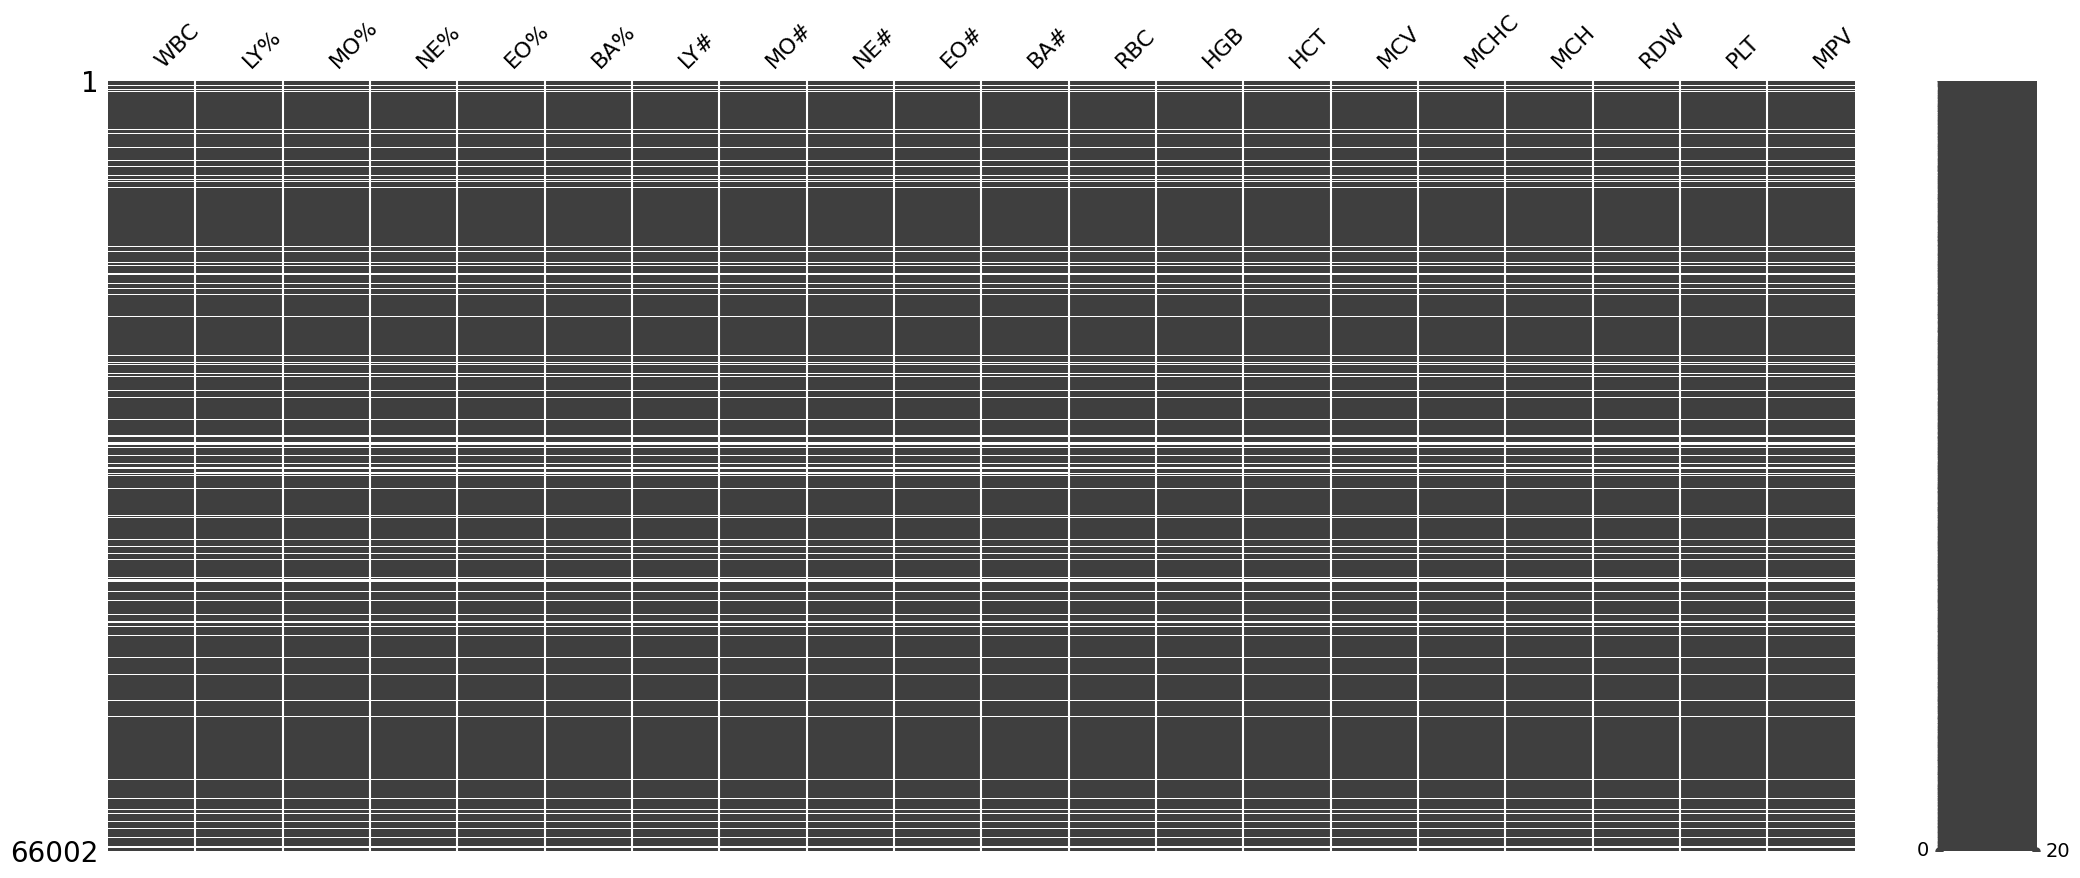

In [ ]:
# Visualize missing data
msno.matrix(df)
plt.show()

In [ ]:
# Drop rows with any missing values
df_clean = df.dropna().copy()
print(f"Shape after dropna: {df_clean.shape}")

Shape after dropna: (59101, 20)


In [ ]:
# Replace erroneous small values (scientific notation placeholders) with 0
small_val = 5.397605346934028e-79
df_clean = df_clean.replace({small_val: 0})

In [ ]:
# Validate: Leukocyte % sum should be ~100
perc_cols = ['LY%', 'MO%', 'NE%', 'EO%', 'BA%']
df_clean['perc_sum'] = df_clean[perc_cols].sum(axis=1)
print(f"Percentage sum mean: {df_clean['perc_sum'].mean():.2f} (SD: {df_clean['perc_sum'].std():.2f})")
print(f"Percentage sum range: {df_clean['perc_sum'].min():.1f} - {df_clean['perc_sum'].max():.1f}")

Percentage sum mean: 100.04 (SD: 0.39)
Percentage sum range: 50.0 - 100.2


In [ ]:
# Validate: Absolute counts sum should match WBC
abs_cols = ['LY#', 'MO#', 'NE#', 'EO#', 'BA#']
df_clean['abs_sum'] = df_clean[abs_cols].sum(axis=1)
df_clean['abs_diff'] = abs(df_clean['WBC'] - df_clean['abs_sum'])
print(f"Absolute sum diff mean: {df_clean['abs_diff'].mean():.2f} (max: {df_clean['abs_diff'].max():.2f})")

Absolute sum diff mean: 0.04 (max: 4.30)


In [ ]:
# Drop validation columns
df_clean = df_clean.drop(['perc_sum', 'abs_sum', 'abs_diff'], axis=1)

In [ ]:
# Outlier detection using IQR for key columns (e.g., WBC)
def detect_outliers_iqr(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers

wbc_outliers = detect_outliers_iqr(df_clean['WBC'])
print(f"WBC outliers: {len(wbc_outliers)} ({wbc_outliers.values if len(wbc_outliers) > 0 else 'None'})")

WBC outliers: 1418 ([12.9 14.2 14.7 ... 12.6 12.5 13.1])


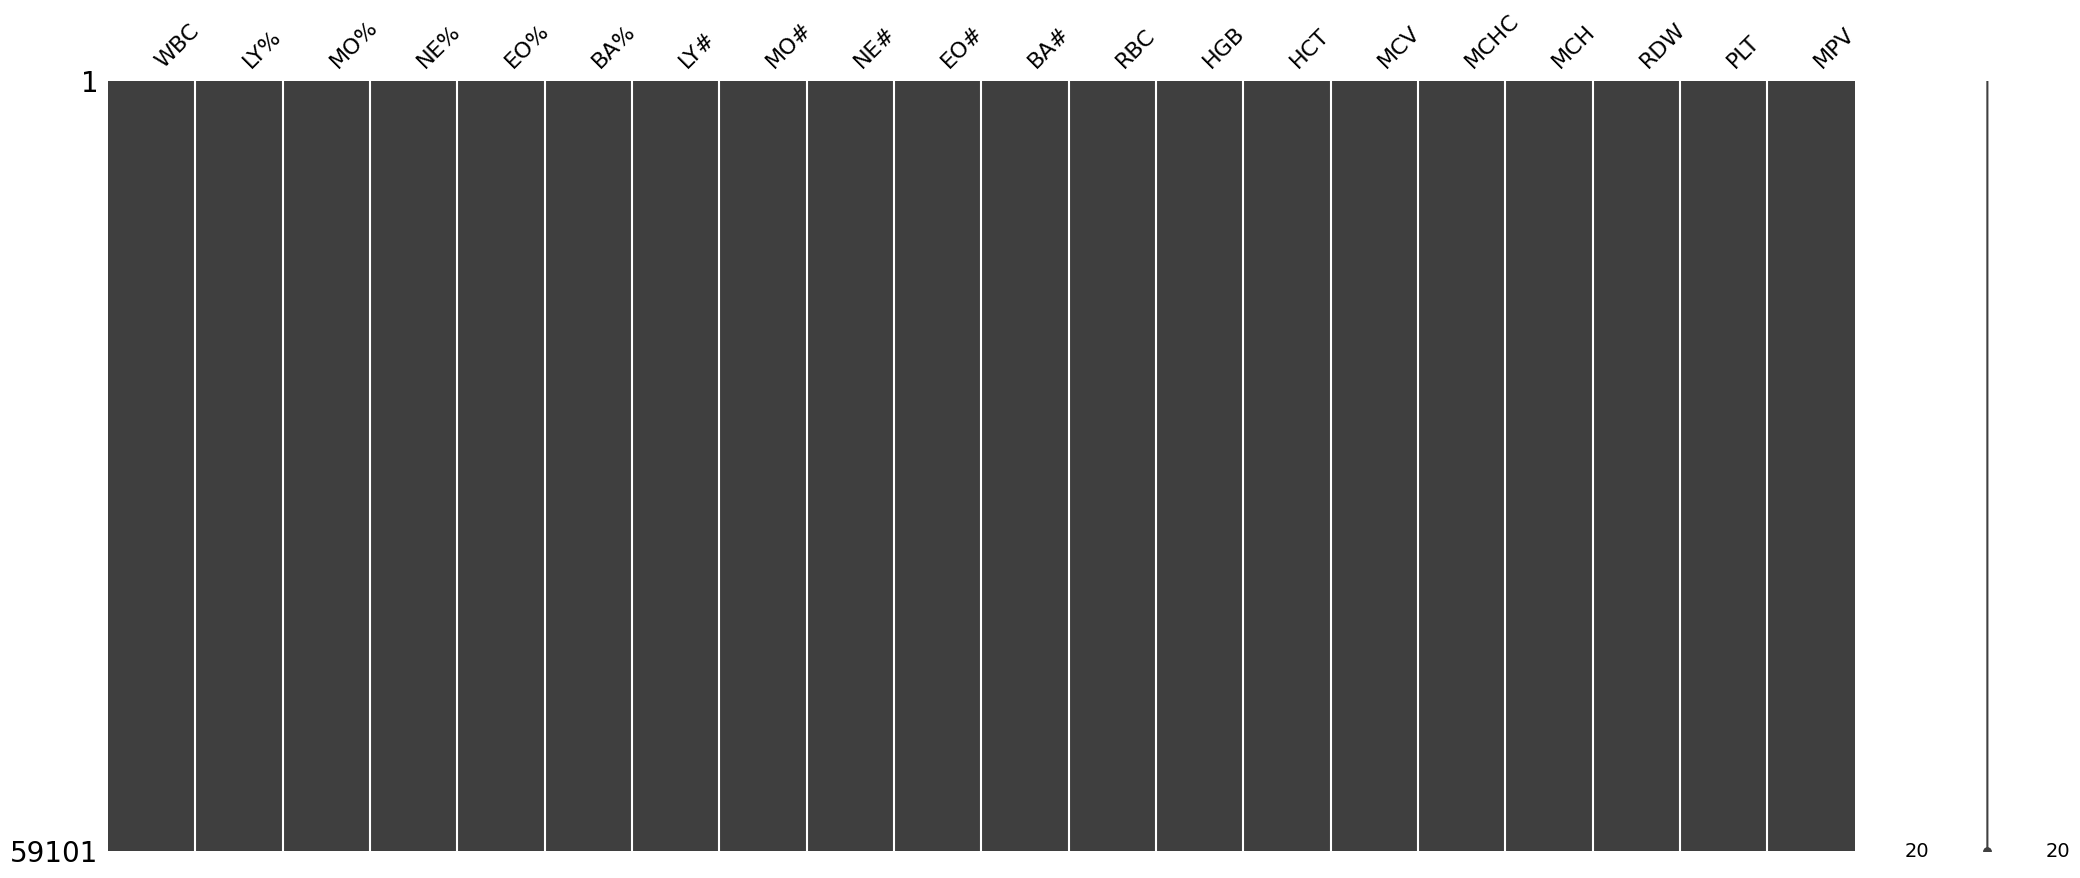

In [ ]:
# Visualize data after cleaning
msno.matrix(df_clean)
plt.show()

In [ ]:
# Updated Summary Statistics (Cleaned Data)
print(df_clean.describe())

                WBC           LY%           MO%           NE%           EO%  \
count  59101.000000  59101.000000  59101.000000  59101.000000  59101.000000   
mean       7.265129     33.448620      7.980044     54.880699      3.043218   
std        2.359005     10.730153      2.412199     11.865035      2.451124   
min        1.400000      2.700000      0.600000      0.800000      0.000000   
25%        5.700000     26.100000      6.400000     47.700000      1.500000   
50%        6.900000     32.300000      7.800000     55.900000      2.400000   
75%        8.400000     39.700000      9.300000     63.100000      3.800000   
max       99.990000     89.700000     66.900000     96.600000     57.200000   

                BA%           LY#           MO#           NE#           EO#  \
count  59101.000000  59101.000000  59101.000000  59101.000000  59101.000000   
mean       0.682444      2.377307      0.562479      4.063598      0.216790   
std        0.598183      1.209544      0.209197    

## **4. Exploratory Data Analysis**

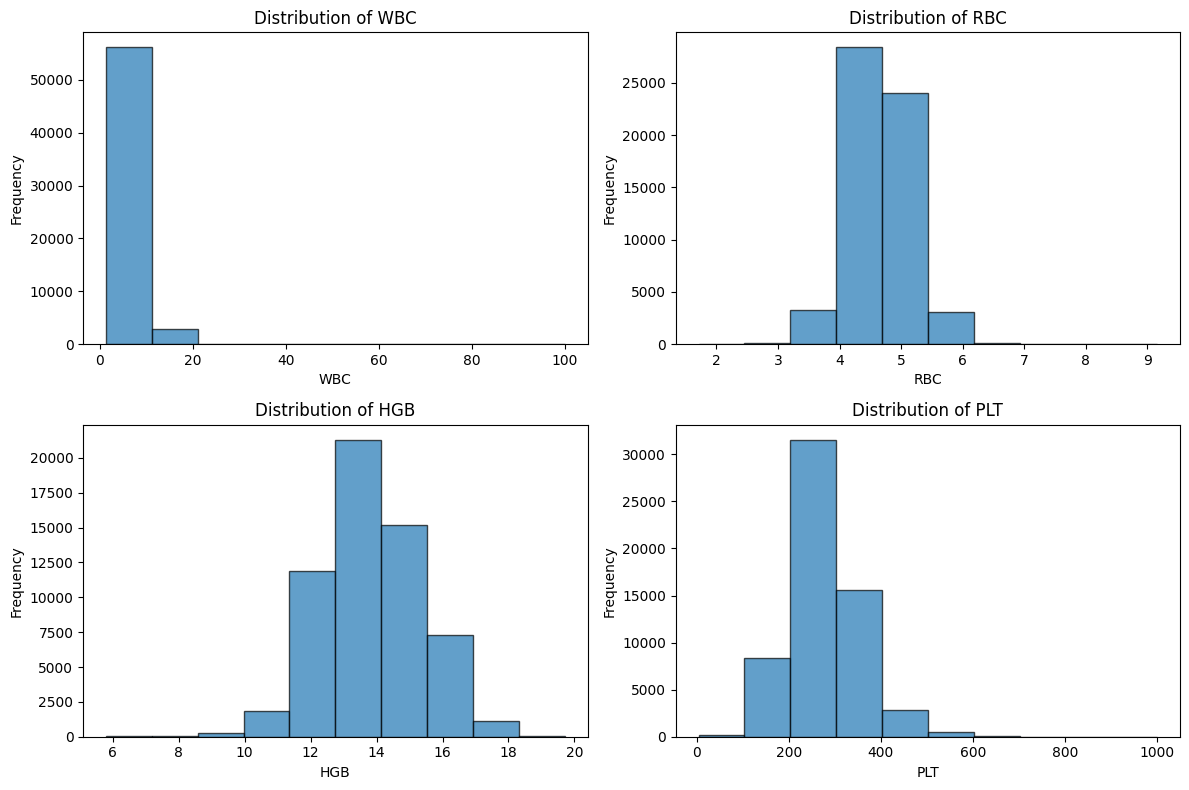

In [ ]:
# Histograms for key numerical columns
key_cols = ['WBC', 'RBC', 'HGB', 'PLT']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
for idx, col in enumerate(key_cols):
    axes[idx].hist(df_clean[col], bins=10, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

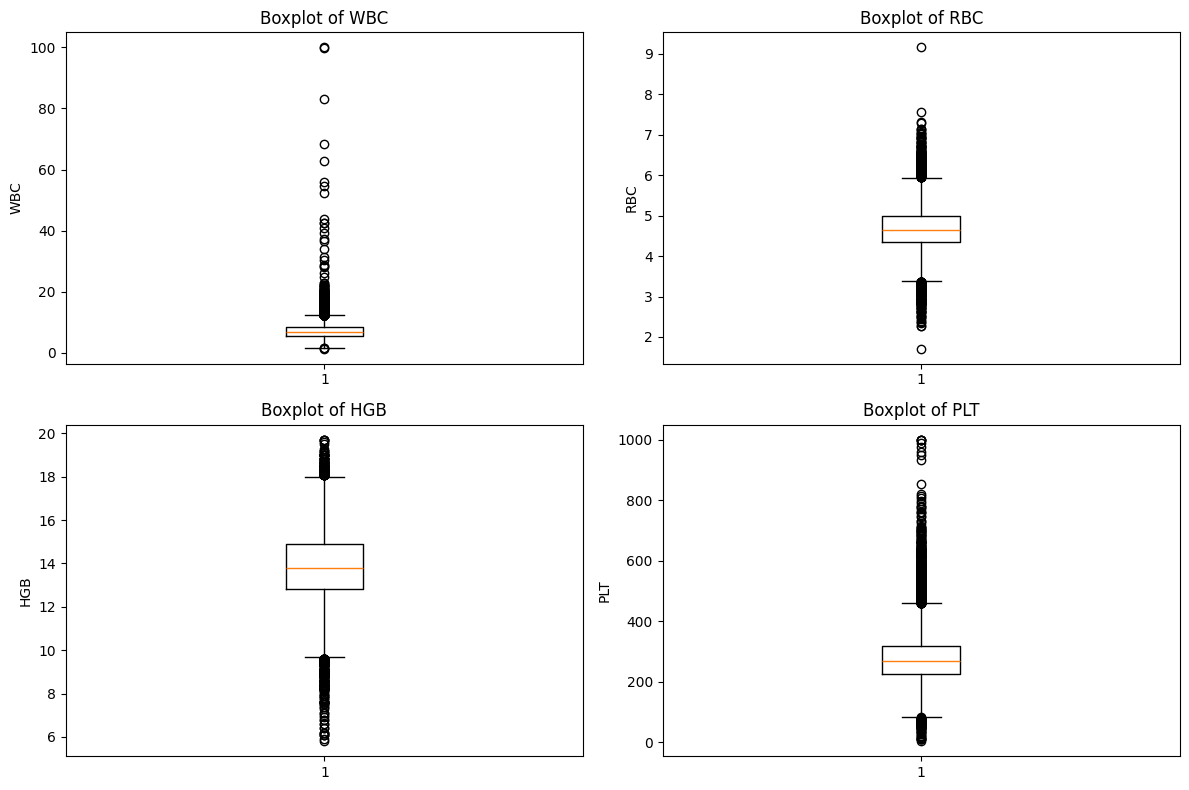

In [ ]:
# Boxplots for key columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
for idx, col in enumerate(key_cols):
    axes[idx].boxplot(df_clean[col])
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_ylabel(col)
plt.tight_layout()
plt.show()

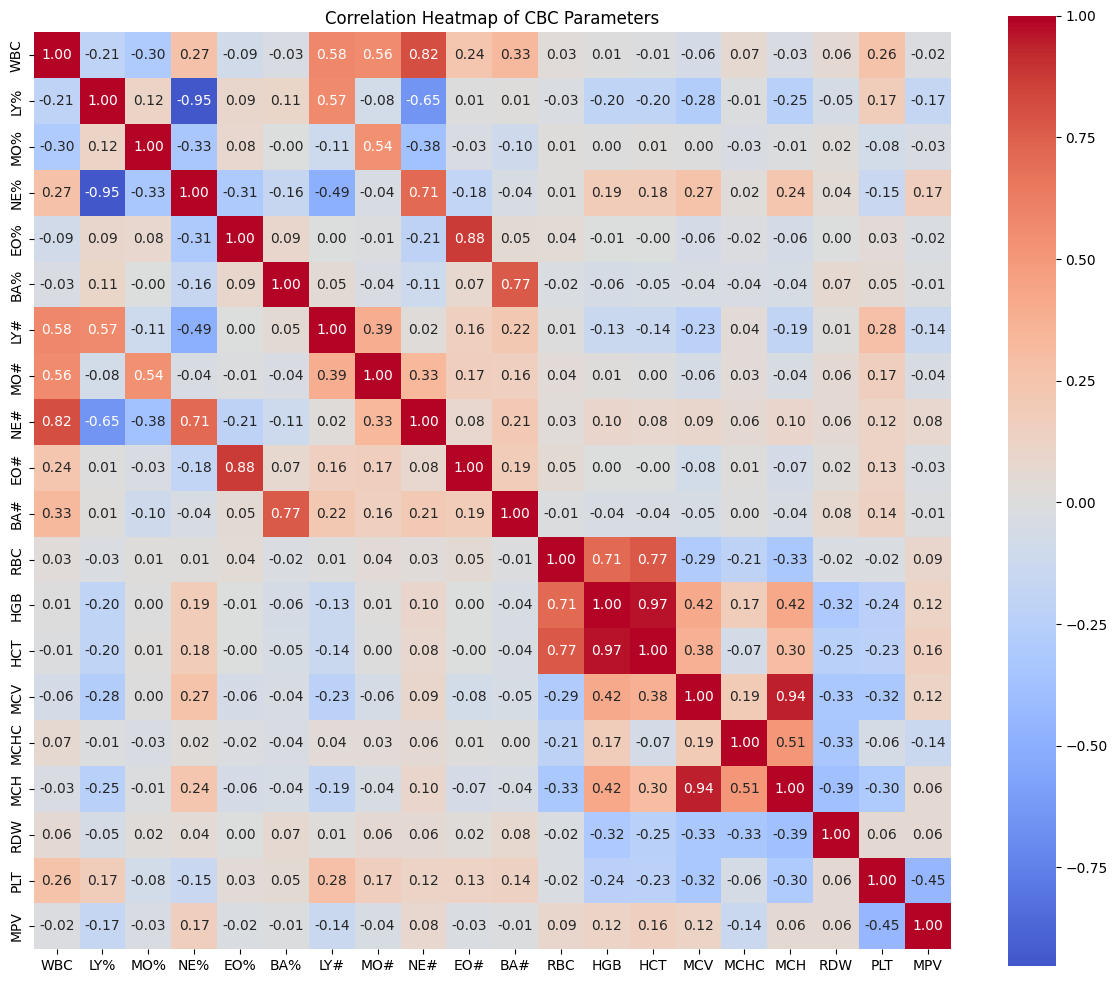

In [ ]:
# Correlation Heatmap
num_cols = df_clean.select_dtypes(include=[np.number]).columns
corr = df_clean[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap of CBC Parameters')
plt.tight_layout()
plt.show()

## **5. Feature Engineering**

In [ ]:
# NLR: Neutrophil-to-Lymphocyte Ratio (inflammation marker; handle LY#=0 to avoid div by zero)
df_clean['NLR'] = np.where(df_clean['LY#'] > 0, df_clean['NE#'] / df_clean['LY#'], df_clean['NE#'])  # Fallback to NE# if LY#=0

# Anemia Flag: Binary indicator (1 if HGB <12 g/dL, potential anemia)
df_clean['Anemia_Flag'] = (df_clean['HGB'] < 12).astype(int)

# Target Classification: Multi-class label based on key parameters (unscaled values)
def classify_target(row):
    # Step 1: Check HGB for anemia types
    if row['HGB'] < 12:
        if row['MCV'] < 80:
            return "microcytic"
        elif row['MCV'] <= 100:
            return "normocytic"
        else:
            return "macrocytic"
# Step 2: Check WBC for Leukemia (normal 4-11 x10^3/uL)
    elif row['WBC'] > 11:
        return "Leukemia"

    # Step 3: Check PLT for Thrombocytopenia (normal 150-450 x10^3/uL)
    elif row['PLT'] < 150:
        return "Thrombocytopenia"

    # Step 4: Otherwise, Normal
    else:
        return "normal"

In [ ]:
# Apply the classification function
df_clean['Target'] = df_clean.apply(classify_target, axis=1)

print("New features added: NLR, Anemia_Flag, Target")
print("\nTarget value counts:")
print(df_clean['Target'].value_counts())
print("\nSample rows with Target:")
print(df_clean[['HGB', 'MCV', 'WBC', 'PLT', 'Target']].head())

New features added: NLR, Anemia_Flag, Target

Target value counts:
Target
normal              50059
normocytic           2999
Leukemia             2880
microcytic           2046
Thrombocytopenia     1039
macrocytic             78
Name: count, dtype: int64

Sample rows with Target:
    HGB   MCV  WBC    PLT      Target
1  14.1  88.5  7.6  214.0      normal
2  13.7  86.9  7.5  270.0      normal
3   9.3  61.5  8.8  471.0  microcytic
4  14.5  84.9  5.9  209.0      normal
5  13.1  91.7  9.6  453.0      normal


In [ ]:
df_clean.head()

,WBC,LY%,MO%,NE%,EO%,BA%,LY#,MO#,NE#,EO#,...,HCT,MCV,MCHC,MCH,RDW,PLT,MPV,NLR,Anemia_Flag,Target
1,7.6,21.1,7.1,66.8,4.4,0.5,1.6,0.5,5.1,0.3,...,41.8,88.5,33.6,29.7,13.7,214.0,7.7,3.187500,0,normal
2,7.5,37.8,8.1,39.0,14.9,0.3,2.8,0.6,2.9,1.1,...,39.3,86.9,34.8,30.3,11.7,270.0,8.6,1.035714,0,normal
3,8.8,57.7,6.2,24.1,11.4,0.6,5.1,0.5,2.1,1.0,...,29.4,61.5,31.6,19.4,15.3,471.0,7.8,0.411765,1,microcytic
4,5.9,37.8,6.2,52.2,3.4,0.4,2.2,0.4,3.1,0.2,...,43.6,84.9,33.3,28.3,13.1,209.0,10.4,1.409091,0,normal
5,9.6,19.4,3.4,75.3,2.0,0.0,1.9,0.3,7.2,0.2,...,38.7,91.7,33.7,30.9,12.8,453.0,7.7,3.789474,0,normal


## **6. Normalization (Robust Scaling)**



In [ ]:
# Normalization (Robust Scaling - Better for Outliers)
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

# Optional: Detect and cap outliers (using your IQR function; cap at 3*IQR for robustness)
def cap_outliers(df, col, multiplier=3):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)
    return df

# Apply capping to key columns (skip if you want to keep all extremes)
key_outlier_cols = ['WBC', 'PLT', 'HGB']  # Add more if needed
for col in key_outlier_cols:
    df_clean = cap_outliers(df_clean, col)
print("Outliers capped in key columns.")

# Now scale with RobustScaler (median + IQR-based)
scaler = RobustScaler()
num_cols_for_scale = [col for col in df_clean.select_dtypes(include=[np.number]).columns if col != 'Anemia_Flag']  # Continuous nums only
df_preprocessed = df_clean.copy()
df_preprocessed[num_cols_for_scale] = scaler.fit_transform(df_clean[num_cols_for_scale])

print("Normalization applied (RobustScaler) to numerical features. Preprocessed data head:")
print(df_preprocessed[['WBC', 'HGB', 'MCV', 'PLT', 'NLR', 'Anemia_Flag', 'Target']].head())
print("\nPreprocessed data description (robust-scaled numerical features):")
print(df_preprocessed[num_cols_for_scale].describe())  # Median ~0, scale based on IQR

Outliers capped in key columns.
Normalization applied (RobustScaler) to numerical features. Preprocessed data head:
        WBC       HGB       MCV       PLT       NLR  Anemia_Flag      Target
1  0.259259  0.142857  0.053333 -0.574468  1.199687            0      normal
2  0.222222 -0.047619 -0.160000  0.021277 -0.575536            0      normal
3  0.703704 -2.142857 -3.546667  2.159574 -1.090294            1  microcytic
4 -0.370370  0.333333 -0.426667 -0.627660 -0.267500            0      normal
5  1.000000 -0.333333  0.480000  1.968085  1.696316            0      normal

Preprocessed data description (robust-scaled numerical features):
                WBC           LY%           MO%           NE%           EO%  \
count  59101.000000  59101.000000  59101.000000  59101.000000  59101.000000   
mean       0.129301      0.084457      0.062084     -0.066188      0.279660   
std        0.802947      0.788982      0.831793      0.770457      1.065706   
min       -2.037037     -2.176471     -

In [ ]:
# Save the preprocessed DataFrame to a new CSV file
output_file_path = "/content/cbc_preprocessed.csv"
df_preprocessed.to_csv(output_file_path, index=False)

print(f"Preprocessed data saved to {output_file_path}")

Preprocessed data saved to /content/cbc_preprocessed.csv
